<a href="https://colab.research.google.com/github/diegoturenne/Application-Oriented-Deep-Learning-Course-2022-UU/blob/main/Exercise_8_1_sine_wave_forecasting_DT_FD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 8.1
## Sinus forecasting
In this task, we will learn to implement RNNs in Keras.
Therefore:
 - Run the provided script and comment on the output.
 - Vary the number and size of the LSTM layers and compare training time and stability of the performance. 

The goal of this task is to predict the next value of a sine function. This is a special case because the output of the network (the `y` value) should correponds to the next input `x` value. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
layers = keras.layers

print(keras.__version__)

2.9.0


### Generation of data
We start by creating a signal trace: `t = 0-100`, `f = sin(pi * t)`

In [ ]:
N = 10000
t = np.linspace(0, 100, N)  # time steps
f = np.sin(np.pi * t)  # signal

Split into semi-redundant sub-sequences of `length = window_size + 1` and perform shuffle

In [ ]:
window_size = 20
n = N - window_size - 1  # number of possible splits
print(f"generating {n} semi redundant sub-sequences with size {window_size+1}.")
data = np.stack([f[i: i + window_size + 1] for i in range(n)])
print(data.shape)

generating 9979 semi redundant sub-sequences with size 21.
(9979, 21)


Finally, split the data into features. The `x` values are the first 20 data points of a sequence. The `y` value is the corresponding next value in the sequence. 

In [ ]:
X, y = np.split(data, [-1], axis=1)

# as always, another dimension is added to the input vector 
# because the KERAS library also allows for multiple inputs per time step. 
# In our case here, we have just one input value per time stamp.
X = X[..., np.newaxis] 
print(X.shape)
print(y.shape)
print('Example:')
print('X =', X[0, :, 0])
print('y =', y[0, :])

(9979, 20, 1)
(9979, 1)
Example:
X = [0.         0.0314139  0.06279679 0.0941177  0.1253457  0.15644998
 0.18739983 0.21816471 0.24871423 0.27901826 0.30904688 0.33877044
 0.36815961 0.39718538 0.42581909 0.45403249 0.48179773 0.50908739
 0.53587454 0.56213275]
y = [0.58783609]


[link text](https://)### Define and train RNN

In [ ]:
z0 = layers.Input(shape=[None, 1])
z1 = layers.LSTM(32, return_sequences=True)(z0)
z2 = layers.LSTM(32, return_sequences=True)(z1)
z3 = layers.LSTM(32, return_sequences=True)(z2)
z4 = layers.LSTM(32, return_sequences=True)(z3)

# z5 = layers.LSTM(16, return_sequences=True)(z4)
# z6 = layers.LSTM(16, return_sequences=True)(z5)
# z7 = layers.LSTM(16, return_sequences=True)(z6)
# z8 = layers.LSTM(16, return_sequences=True)(z7)

# z9 = layers.LSTM(16, return_sequences=True)(z8)
# z10 = layers.LSTM(16, return_sequences=True)(z9)
# z11 = layers.LSTM(16, return_sequences=True)(z10)
# z12 = layers.LSTM(16, return_sequences=True)(z11)

# z13 = layers.LSTM(16, return_sequences=True)(z12)
# z14 = layers.LSTM(16, return_sequences=True)(z13)
# z15 = layers.LSTM(16, return_sequences=True)(z14)
z16 = layers.LSTM(16, )(z4)

z = layers.Dense(1)(z16)
model = keras.models.Model(inputs=z0, outputs=z)
print(model.summary())

model.compile(loss='mse', optimizer='adam')

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, 1)]         0         
                                                                 
 lstm_5 (LSTM)               (None, None, 32)          4352      
                                                                 
 lstm_6 (LSTM)               (None, None, 32)          8320      
                                                                 
 lstm_7 (LSTM)               (None, None, 32)          8320      
                                                                 
 lstm_8 (LSTM)               (None, None, 32)          8320      
                                                                 
 lstm_9 (LSTM)               (None, 16)                3136      
                                                                 
 dense_1 (Dense)             (None, 1)                 17  

In [ ]:
results = model.fit(X, y,
    epochs=150,
    batch_size=32,
    verbose=2,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.ReduceLROnPlateau(factor=0.67, patience=3, verbose=1, min_lr=1E-5),
        keras.callbacks.EarlyStopping(patience=4, verbose=1)])

Epoch 1/150
281/281 - 24s - loss: 0.0445 - val_loss: 2.1950e-04 - lr: 0.0010 - 24s/epoch - 84ms/step
Epoch 2/150
281/281 - 12s - loss: 9.4609e-05 - val_loss: 3.6488e-05 - lr: 0.0010 - 12s/epoch - 41ms/step
Epoch 3/150
281/281 - 11s - loss: 1.4508e-04 - val_loss: 1.2957e-05 - lr: 0.0010 - 11s/epoch - 39ms/step
Epoch 4/150
281/281 - 11s - loss: 4.6268e-04 - val_loss: 2.8255e-05 - lr: 0.0010 - 11s/epoch - 40ms/step
Epoch 5/150

Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0006700000318232924.
281/281 - 11s - loss: 2.1672e-05 - val_loss: 2.7630e-05 - lr: 0.0010 - 11s/epoch - 41ms/step
Epoch 6/150
281/281 - 11s - loss: 8.4229e-06 - val_loss: 4.8244e-06 - lr: 6.7000e-04 - 11s/epoch - 39ms/step
Epoch 7/150
281/281 - 12s - loss: 6.4372e-06 - val_loss: 4.7729e-06 - lr: 6.7000e-04 - 12s/epoch - 41ms/step
Epoch 8/150

Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0004489000252215192.
281/281 - 11s - loss: 1.2491e-05 - val_loss: 6.2835e-06 - lr: 6.7000e-04 - 11s/epoch - 39ms/ste

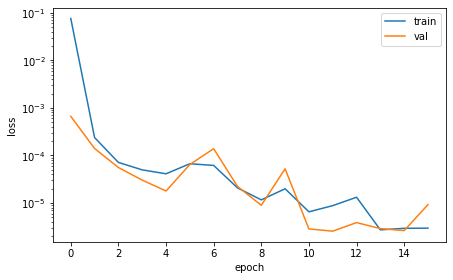

In [ ]:
plt.figure(1, (12, 4))
plt.subplot(1, 2, 1)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.ylabel('loss')
plt.yscale("log")
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.tight_layout()

In [ ]:
print(results.history['val_loss'][-1])

9.26886968954932e-06


### Comment: As Christian commented in the lecture, the loss keeps decreasing with epochs past 60: re-ran the code with 100 epochs and now the small deviations he showed in the lecture are gone ( can be seen in the plots bellow) 

### Comment #2:


tried with 64 LSTM layer size: val_loss at 1.5939941988563078e-07: early stopped at 73 epochs 

tried with 32 LSTM layer size: val_loss at 1.893682721743062e-08: early stopped at 117 epochs 

tried with 16 LSTM layer size: val_loss at 1.2941247007347556e-07 :early stopped at 105 epochs

tired with 8 LSTM layer size: val_loss at 5.792084607492143e-07 

tried with 4 LSTM layer size: val_loss at 1.1311515663692262e-05 convergence reached at about epoch #50


### Comment #3: Different number of layers, all layers are size  16

1 layer:  val_loss at 1.2941247007347556e-07:early stopped at 105 epochs

2 layers: val_loss at 3.37172963327248e-07: early stopped at  64 epochs

3 layers: val_loss at 2.85796346588540e-07: early stopped at 34  epochs

4 layers: val_loss at 2.77158278549904e-07: early stopped at 31  epochs

8 layers: val_loss at 0.008706843480467796: early stopped at 30  epochs

16 layers: val_loss at 0.02705045044422149: early stopped at 24  epochs



In [ ]:
print(results.history['val_loss'][-1])

0.027050450444221497


### Evaluate the model
Investigate the forecasting capabilities of the model.

In [ ]:
def predict_next_k(model, window, k=10):
    """Predict next k steps for the given model and starting sequence """
    x = window[np.newaxis, :, np.newaxis]  # initial input
    y = np.zeros(k)
    for i in range(k):
        y[i] = model.predict(x, verbose=0)
        # create the new input including the last prediction
        x = np.roll(x, -1, axis=1)  # shift all inputs 1 step to the left
        x[:, -1] = y[i]  # add latest prediction to end
    return y

In [ ]:
def plot_prediction(i0=0, k=500):
    """ Predict and plot the next k steps for an input starting at i0 """
    y0 = f[i0: i0 + window_size]  # starting window (input)
    y1 = predict_next_k(model, y0, k)  # predict next k steps

    t0 = t[i0: i0 + window_size]
    t1 = t[i0 + window_size: i0 + window_size + k]

    plt.figure(figsize=(12, 4))
    plt.plot(t, f, label='data')
    plt.plot(t0, y0, color='C1', lw=3, label='prediction')
    plt.plot(t1, y1, color='C1', ls='--')
    plt.xlim(0, 10)
    plt.legend()
    plt.xlabel('$t$')
    plt.ylabel('$f(t)$')

In [ ]:
plot_prediction(12)

ValueError: ignored

In [ ]:
plot_prediction(85)

In [ ]:
plot_prediction(115)

In [ ]:
model.predict(x, verbose=0)

In [1]:
#log using different architecures/sizes

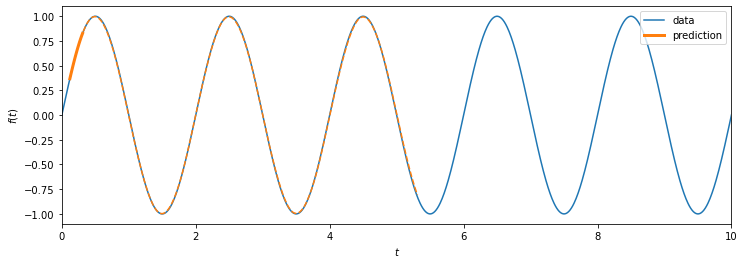

In [ ]:
plot_prediction(12)

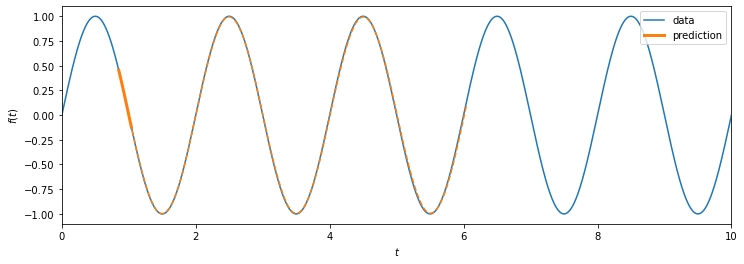

In [ ]:
plot_prediction(85)

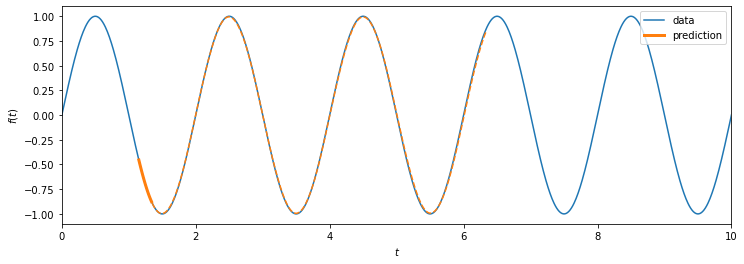

In [ ]:
plot_prediction(115)